<a href="https://colab.research.google.com/github/sasi6996/Sasank-Kantana/blob/master/two_class_classifier_rebootrx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Two Class Classifier - RebootRx Dataset

**Libraries Required:**

The following are the Libraries and packages required for pre-processing the dataset and building a text classifier

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
from google.colab import drive
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

### Importing Dataset

The Dataset is in the format of excel sheet which contains two tabs - Train Data & Test Data

In [3]:
#Accessing the data file from Google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#converting the dataset which is an excel sheet into a Pandas DataFrame
train_data=pd.read_excel("/content/gdrive/My Drive/Rebootrx_ML_test.xlsx", sheet_name = 'train')     # Replace the path with the location of excel file your google drive

### Data Preprocessing



In [8]:
#Displaying the Dataset as Pandas Dataframe
display(train_data.head())

,pmid,drug,title,abstract,label
0,200767,Prednisone,Hepatoma in a child with methotrexate-induced ...,"During autopsy, an 11-year-old girl with acute...",Exclude
1,227055,Streptozocin,Hazards of hepatic artery infusion of streptoz...,Three patients with metastatic malignancy rece...,Exclude
2,1058041,Prednisone,Cytogenetic studies in a patient with acute gr...,During a 7 1/2-yr period we monitored a chromo...,Exclude
3,1312301,alpha 1-proteinase,Increased levels of plasma thrombomodulin in c...,Circulating blood plasma contains proteinase-d...,Exclude
4,1362746,cefotetan,Single-dose amoxycillin-clavulanic acid vs. ce...,"A prospective, multicentre, randomized trial w...",Exclude


### Missing Values

We shall identify the missing values in each column of the dataset

In [9]:
# function to replace and represent the missing values with 0
train_data = train_data.replace(0, np.NaN)

print(train_data.isnull().sum())

pmid         0
drug        90
title        0
abstract     0
label        0
dtype: int64


We can observes that in the column 'drug' we have 90 missing values and all we do not have any missing values in any other 

In [10]:
#function to replace missing vales with NaN
train_data.fillna(train_data.mean(), inplace = True)
train_data.loc[train_data['drug'].isnull()]               

,pmid,drug,title,abstract,label
510,15687,NaN,"[Adrenergic component in the hepatotropic, car...","The effect of norepinephine, an adrenomietic d...",Exclude
511,170818,NaN,Cytopathological effects of estradiol on the a...,Large subcutaneous doses (2 mg/21 days) of est...,Exclude
512,199903,NaN,[Influence of methylcobalamin and cyanocobalam...,The effect of methylcobalamine (5.6-dimethylbe...,Exclude
513,205183,NaN,Endometrial carcinoma following estrogen thera...,Three patients with metastatic breast cancer r...,Exclude
514,280716,NaN,Enhancement of rat hepatocellular-altered foci...,Altered foci resistant to iron accumulation we...,Exclude
...,...,...,...,...,...
969,30827998,NaN,Potential Anticancer Activity of Auranofin.,Gold compounds have a long history of use in m...,Exclude
976,30880819,NaN,CAR T-Cell Therapy: Update on the State of the...,BACKGROUND: Chimeric antigen receptor (CAR) T-...,Exclude
980,31013012,NaN,Treatment of Psoriasis With Biologics and Apre...,NTRODUCTION: Biologics have transformed the ma...,Exclude
984,31030325,NaN,Allantoin reduces cell death induced by cispla...,Massive lysis of tumor mass in cancer patients...,Exclude


In [13]:
test_data = pd.read_excel('/content/gdrive/My Drive/Rebootrx_ML_test.xlsx', sheet_name='test')

### Label Encoding

Here we are going to label the categories 'Exclude' and 'Include' in the label column using category codes approach. By default, a non-numerical column(label) is of 'object' type. So, we should chance the type of 'category' before labelling

In [14]:
# Let's encode the two different classes in the column label in Training Data
from sklearn.preprocessing import LabelEncoder

#converting type of columns to 'category'
labels = train_data['label']
train_data['label'] = train_data['label'].astype('category') 

# Assigning numerical values and replacing the categorical values of the column with labels
train_data['label'] = train_data['label'].cat.codes
display(train_data['label'])

0      0
1      0
2      0
3      0
4      0
      ..
992    1
993    1
994    1
995    1
996    1
Name: label, Length: 997, dtype: int8

In [15]:
# Label encoding for the classes in the Test Data
test_data['label'] = test_data['label'].astype('category')

# converting type of column to category
test_data['label'] = test_data['label'].cat.codes
display(test_data['label'].head())

# Assigning numerical values and replacing the categorical values
df2 = test_data[['title','abstract', 'label']]
df2.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int8

,title,abstract,label
0,Antihemophilic factor [factor VIII] preparatio...,To examine the role of antihemophilic factor (...,0
1,Systemic perioperative prophylaxis in elective...,A prospective randomized study was performed w...,0
2,Enzymatically active cathepsin B dissociating ...,Using fluorogenic substrates and the specific ...,0
3,Neutrophil elastase alpha 1-proteinase inhibit...,Polymorphonuclear (PMN) granulocyte derived ne...,0
4,Comparison of intramuscular dezocine with buto...,Sixty hospitalized subjects with chronic moder...,0


In [16]:
display(train_data.head())

,pmid,drug,title,abstract,label
0,200767,Prednisone,Hepatoma in a child with methotrexate-induced ...,"During autopsy, an 11-year-old girl with acute...",0
1,227055,Streptozocin,Hazards of hepatic artery infusion of streptoz...,Three patients with metastatic malignancy rece...,0
2,1058041,Prednisone,Cytogenetic studies in a patient with acute gr...,During a 7 1/2-yr period we monitored a chromo...,0
3,1312301,alpha 1-proteinase,Increased levels of plasma thrombomodulin in c...,Circulating blood plasma contains proteinase-d...,0
4,1362746,cefotetan,Single-dose amoxycillin-clavulanic acid vs. ce...,"A prospective, multicentre, randomized trial w...",0


The classes 'Exclude' and 'Include' are labeled as 0 and 1

In [17]:
df = train_data[['abstract', 'label']]
df.head()

,abstract,label
0,"During autopsy, an 11-year-old girl with acute...",0
1,Three patients with metastatic malignancy rece...,0
2,During a 7 1/2-yr period we monitored a chromo...,0
3,Circulating blood plasma contains proteinase-d...,0
4,"A prospective, multicentre, randomized trial w...",0


In [18]:
display(test_data.head())

,pmid,drug,title,abstract,label
0,3084691,antihemophilic factor,Antihemophilic factor [factor VIII] preparatio...,To examine the role of antihemophilic factor (...,0
1,3150952,cefotetan/aztreonam,Systemic perioperative prophylaxis in elective...,A prospective randomized study was performed w...,0
2,3202966,alpha 1-proteinase,Enzymatically active cathepsin B dissociating ...,Using fluorogenic substrates and the specific ...,0
3,3260636,alpha 1-proteinase,Neutrophil elastase alpha 1-proteinase inhibit...,Polymorphonuclear (PMN) granulocyte derived ne...,0
4,3301154,butorphanol,Comparison of intramuscular dezocine with buto...,Sixty hospitalized subjects with chronic moder...,0


### Text Preprocessing

In [19]:
# Let is check how many words are present in the data
print(df['abstract'].apply(lambda x: len(x.split(' '))).sum())

230832


We can observe the there are approximately 0.23 million words present in the data.

In [51]:
# function to look at 'abstract' and 'label' pairs
def print_plot(index):
    example = df[df.index == index][['abstract', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_plot(10)

ability tumor cells express elevated levels proteinases capable degrading tissue matrix basement membrane components vitro correlated invasive metastatic potential many vitro invasion assays performed either presence serum tumor cells previously grown serum since serum contains large amounts active proteinase inhibitors presence could complicate interpretations therefore attempted measure amounts serine proteinase inhibitors released culture medium two rat mammary adenocarcinoma metastatic variants selected vitro serumindependent growth differing vivo metastatic behavior concentrated spent media csm derived cultures poorly metastatic mtln2 t42d highly metastatic mtln3 t17d tumor cells grown presence absence fetal bovine serum fbs 2024 h compared presence serine proteinase inhibitors capable inactivating alphachymotrypsin results show mtln2 t42d mtln3 t17d tumor cells exposed fbs csm mtln2 t42d exhibited nearly 5fold greater amounts active proteinase inhibitors mtln3 t17d amount protein

#### It is clearly evident that the data has to be cleaned up. For this we shall perform few text cleaning techniques

For this particular data set, our text cleaning step includes HTML decoding, remove stop words, change text to lower case, remove punctuation, remove bad characters, and so on.

In [21]:
import re
import nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords

       
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
 

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['abstract'] = df['abstract'].apply(clean_text)
print_plot(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
ability tumor cells express elevated levels proteinases capable degrading tissue matrix basement membrane components vitro correlated invasive metastatic potential many vitro invasion assays performed either presence serum tumor cells previously grown serum since serum contains large amounts active proteinase inhibitors presence could complicate interpretations therefore attempted measure amounts serine proteinase inhibitors released culture medium two rat mammary adenocarcinoma metastatic variants selected vitro serumindependent growth differing vivo metastatic behavior concentrated spent media csm derived cultures poorly metastatic mtln2 t42d highly metastatic mtln3 t17d tumor cells grown presence absence fetal bovine serum fbs 2024 h compared presence serine proteinase inhibitors capable inactivating alphachymotrypsin results show mtln2 t42d mtln3 t17d tumor cells exposed f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Now, we have obtained cleaned abastract data.

In [22]:
#funtion to check how many words are prersent in data after text cleaning
df['abstract'].apply(lambda x: len(x.split(' '))).sum()

154353

After Text cleaning, out of 0.23 million words, we have only 0.15 million words only

In [23]:
print_plot(30)

mouse cardiotrophin1 ct1 hypertrophyinducing factor cardiac myocytes interacts cell surface receptors incorporate signaling molecule gp130 cytokines utilizing receptor subunit stimulate acutephase protein synthesis tested cardiotrophin1 vitro assays protein synthesis primary rat hepatocytes rat hepatoma cells h35 human hepatoma cells hepg2 ct1 showed dosedependent induction protein synthesis primary rat hepatocytes effective concentrations ranging 01 100 ng ml production number acutephase proteins including alpha 1cysteine proteinase inhibitor alpha 1cpi alpha 1proteinase inhibitor alpha 1pi alpha 2macroglobulin alpha 1acid glycoprotein markedly increased 48 72 h cytokine stimulation rat h35 cells ct1 stimulated alpha 1pi alpha 1cpi protein production upregulated alpha 1cpi mrna levels similar potency compared il6type human cytokines optimal concentrations parallel assays ct1 induced similar levels acutephase proteins human oncostatin om leukemia inhibitory factor lif whereas human il6

Let us now get the frequency distribution of words in the text, for this, we shall use 'nltk.FreqDist()' function to get the list of top words used in the text, providing a breif outlook of the main topic in the text data.

In [24]:
import nltk
nltk.download('punkt')         #Use if the code does'nt recognize the function 'punkt'
from nltk.tokenize import word_tokenize

abstract = df.abstract.str.cat(sep='')

#function to split text into word
tokens = word_tokenize(abstract)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
bow=sorted(frequency_dist, key = frequency_dist.__getitem__,reverse = True)[0:50]
# this gives us the top 50 words used in the text.
print(bow)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
18148
['patients', 'cancer', 'cells', 'cell', 'treatment', 'tumor', 'study', 'group', 'results', 'effects', 'significantly', 'p', 'effect', 'activity', 'mg', 'growth', '2', '1', 'expression', 'mice', 'vitro', 'human', 'clinical', 'compared', 'drug', 'therapy', 'significant', 'vivo', 'levels', 'used', 'studies', 'survival', 'using', 'methods', 'also', 'may', '3', 'efficacy', 'increased', 'breast', 'use', 'showed', 'potential', 'apoptosis', 'groups', 'kg', 'reduced', 'combination', 'placebo', 'lines']


In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualize the most frequent words in the data using Wordcloud

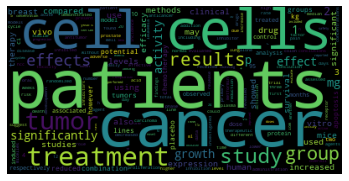

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the visualization we can grab a gist of most frequent words in the data.

### Building a Classifier

### Splitting Data into Train and Test subsest

As the data is cleaned up, we shall now build the classifier to identify the sentiment of each drug whether it shall be included or excluded for the down stream analysis

In [27]:
# Using the data in the train sheet to train the model
#as we have 997 rows of data we shall be including all the data for training purpose
X_train = train_data.loc[:997, 'abstract'].values
y_train = train_data.loc[:997, 'label'].values

# Using the data in the test sheet to evaluate the model
X_test = test_data.loc[:54, 'abstract'].values
y_test = test_data.loc[:54, 'label'].values

 Using the Scikit-Learner library, we can make use of few tools to further pre-process the text. We use TfidTransformer to convert the text corpus into feature vectros.

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train) # converting train data words into feature vectors
test_vectors = vectorizer.transform(X_test)   # converting the test data words into feature vectors

# Training Section
Traning and fitting the model with the train data

In [31]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'hinge', alpha = 1e-3, random_state = 42, max_iter=5, tol = None)
sgd_clf = sgd.fit(train_vectors, y_train) #function to the fit the model with feature vectors of train data

# Validation Section
Validating the test data using evaluation metrics

In [34]:
# function to predict the test data 
sgd_predict = sgd.predict(test_vectors)

print('accuracy %s' %accuracy_score(sgd_predict, y_test))
print(classification_report(y_test, sgd_predict))

accuracy 0.8545454545454545
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        30
           1       0.90      0.76      0.83        25

    accuracy                           0.85        55
   macro avg       0.86      0.85      0.85        55
weighted avg       0.86      0.85      0.85        55



**The classification report describes that the Linear Support Vector amchine model perfomed with 85% of accuracy.**

This is the highest accuracy of all the models where Naive Bayes Multinomial method has given 82% accuracy and Logistic Regression model has given 84% of accuracy which is just 1% less than Linear Support Vector machine model.

**End of Model**